In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib widget
import os
import sys
import importlib
import glob
from tqdm import tqdm



module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import tools
import math_functions as mf

importlib.reload(tools)
importlib.reload(mf)



<module 'math_functions' from 'c:\\Users\\Orlando\\Desktop\\DREAM_repo\\math_functions.py'>

In [3]:
exp_path = "C:/Users/Orlando/ownCloud - ORLANDO Marcelo@mycore.cnrs.fr/Doutorado/Dados experimentais/JTS/20230905_actinic_bode"
folders = sorted(glob.glob(exp_path + "/*"), key=os.path.getmtime)
folders

['C:/Users/Orlando/ownCloud - ORLANDO Marcelo@mycore.cnrs.fr/Doutorado/Dados experimentais/JTS/20230905_actinic_bode\\2023-09-05_11-53-00_Bode_128Hz',
 'C:/Users/Orlando/ownCloud - ORLANDO Marcelo@mycore.cnrs.fr/Doutorado/Dados experimentais/JTS/20230905_actinic_bode\\2023-09-05_11-55-55_Bode_64Hz',
 'C:/Users/Orlando/ownCloud - ORLANDO Marcelo@mycore.cnrs.fr/Doutorado/Dados experimentais/JTS/20230905_actinic_bode\\2023-09-05_11-58-27_Bode_32Hz',
 'C:/Users/Orlando/ownCloud - ORLANDO Marcelo@mycore.cnrs.fr/Doutorado/Dados experimentais/JTS/20230905_actinic_bode\\2023-09-05_12-01-03_Bode_16Hz',
 'C:/Users/Orlando/ownCloud - ORLANDO Marcelo@mycore.cnrs.fr/Doutorado/Dados experimentais/JTS/20230905_actinic_bode\\2023-09-05_12-03-46_Bode_8Hz',
 'C:/Users/Orlando/ownCloud - ORLANDO Marcelo@mycore.cnrs.fr/Doutorado/Dados experimentais/JTS/20230905_actinic_bode\\2023-09-05_12-06-33_Bode_4Hz',
 'C:/Users/Orlando/ownCloud - ORLANDO Marcelo@mycore.cnrs.fr/Doutorado/Dados experimentais/JTS/202309

In [4]:
timestamps = []
signals = []
frequency_list = []
integration_time = []

for folder in tqdm(folders):
    data = pd.read_csv(glob.glob(folder + "/*Hz.csv")[0], index_col=0)
    frequency_list.append(folder.split("Bode_")[-1].split("Hz")[0])
    aux_time, aux_signal = tools.integrate_acquisition(data.Signal, timestamps= data.Time, integration_time=0.01)
    timestamps.append(aux_time)
    signals.append(aux_signal)

frequency_list = np.array(frequency_list, dtype=float) 

  0%|          | 0/13 [00:00<?, ?it/s]

100%|██████████| 13/13 [04:04<00:00, 18.80s/it]


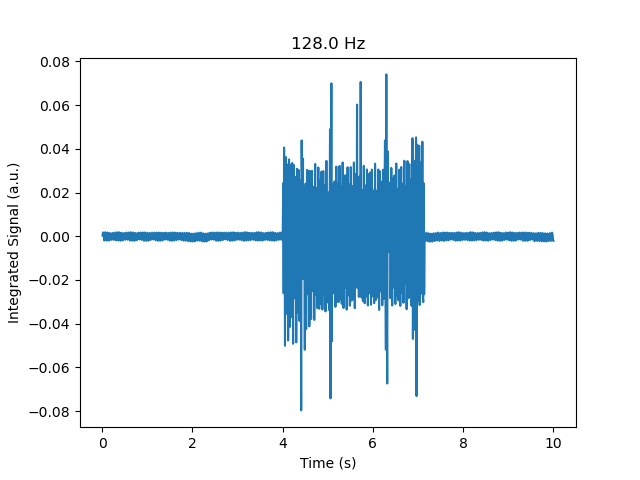

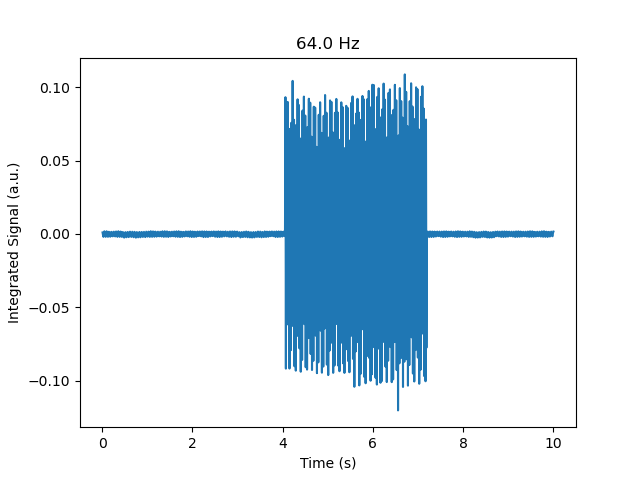

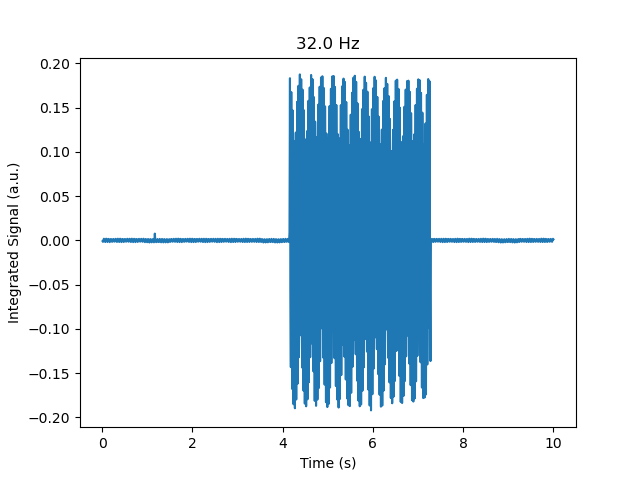

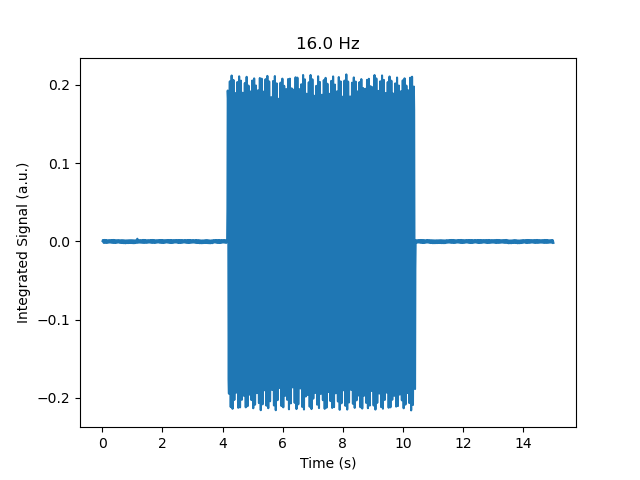

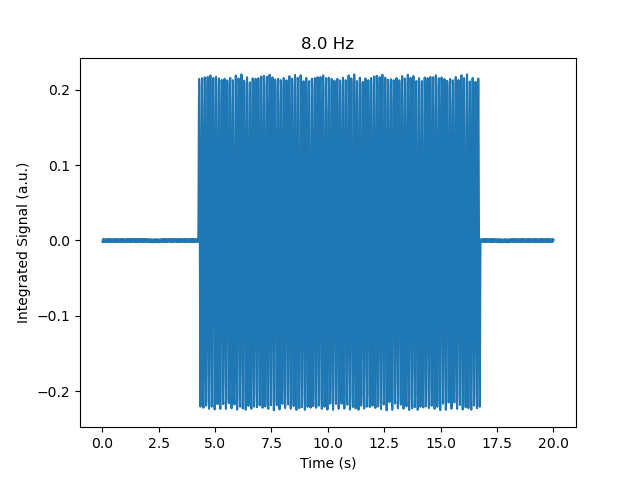

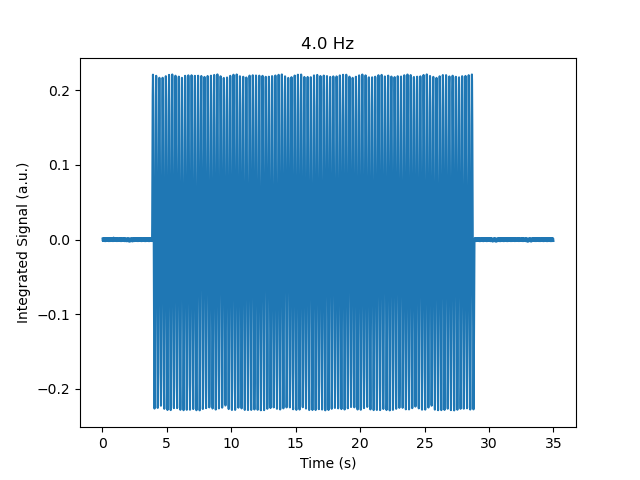

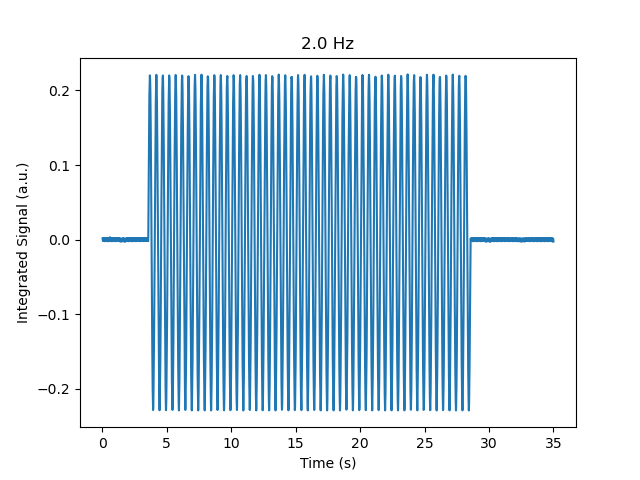

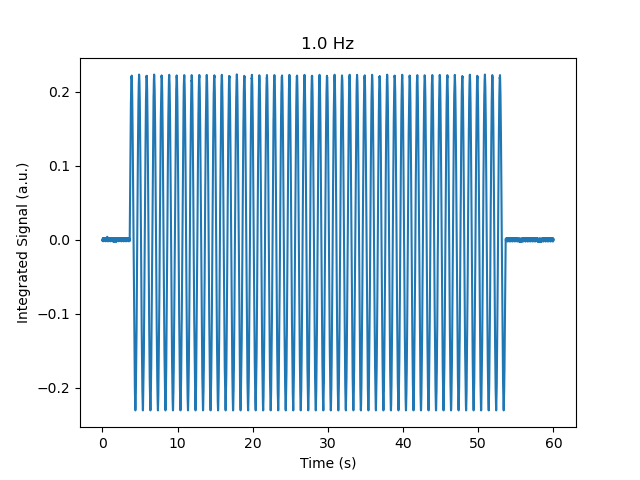

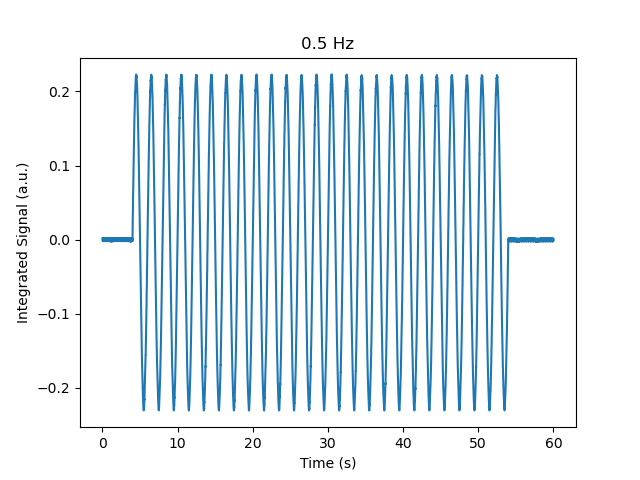

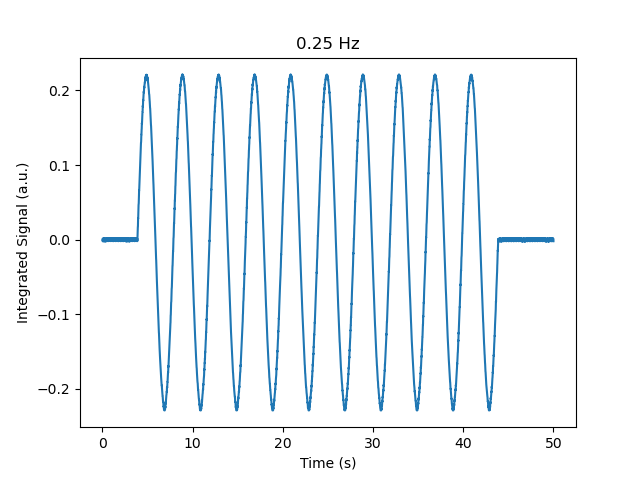

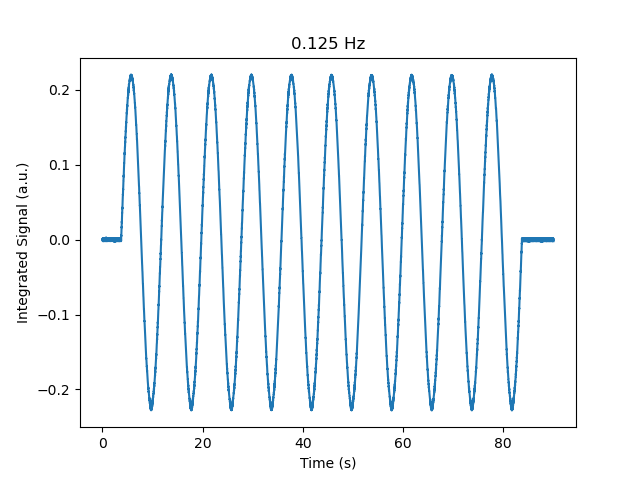

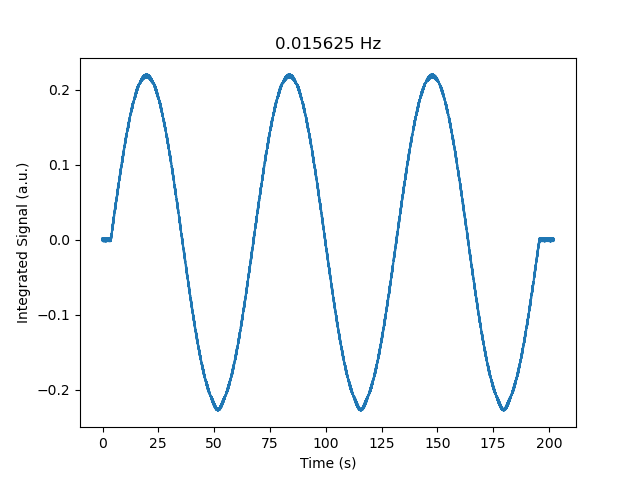

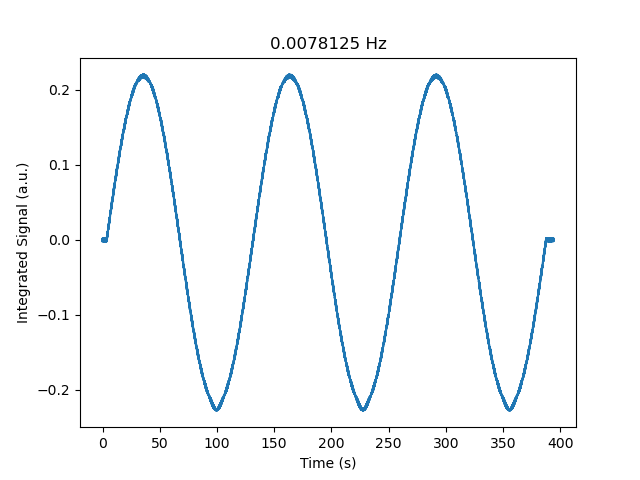

In [5]:
for i, freq in enumerate(frequency_list):
    fig, ax = plt.subplots()
    ax.plot(timestamps[i], signals[i])
    ax.set_title(f"{freq} Hz")
    ax.set_xlabel("Time (s)")
    ax.set_ylabel("Integrated Signal (a.u.)")


In [6]:
(data.Time[1] - data.Time[0])

2e-05